In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#New by Daniel
#from sandbox.sandbox import KinectV2 as kinect
#from sandbox.sandbox import ArucoMarkers as marker
#import Sandbox as sb

./../../../open_AR_Sandbox\sandbox\sandbox.py:11: UserWarning: Freenect is not installed. if you are using the Kinect Version 2 on a windows machine, use the KinectV2 class!
  'Freenect is not installed. if you are using the Kinect Version 2 on a windows machine, use the KinectV2 class!')
./../../../gempy-1.16\gempy\plotting\visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
./../../../gempy-1.16\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
./../../../gempy-1.16\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
./../../../gempy-1.16\gempy\posterior_a

In [2]:
kinect = sb.KinectV2()
marker = sb.ArucoMarkers()

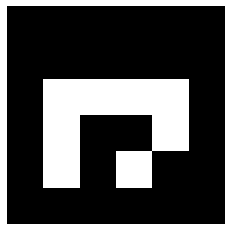

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
marker.create_aruco_marker(1,1,True)

In [28]:
marker.find_markers_ir(kinect)

,Corners_IR_y,Corners_IR_x
ids,,
6,102,107
2,108,456
11,380,101
16,391,449


In [42]:
marker.find_markers_rgb(kinect)

,Corners_RGB_y,Corners_RGB_x
ids,,
16,1032,1581
11,1007,553
6,199,568
2,200,1582
15,462,1610


In [43]:
df=marker.update_dict_markers_current()

In [44]:
df.to_csv('pd_info.csv')

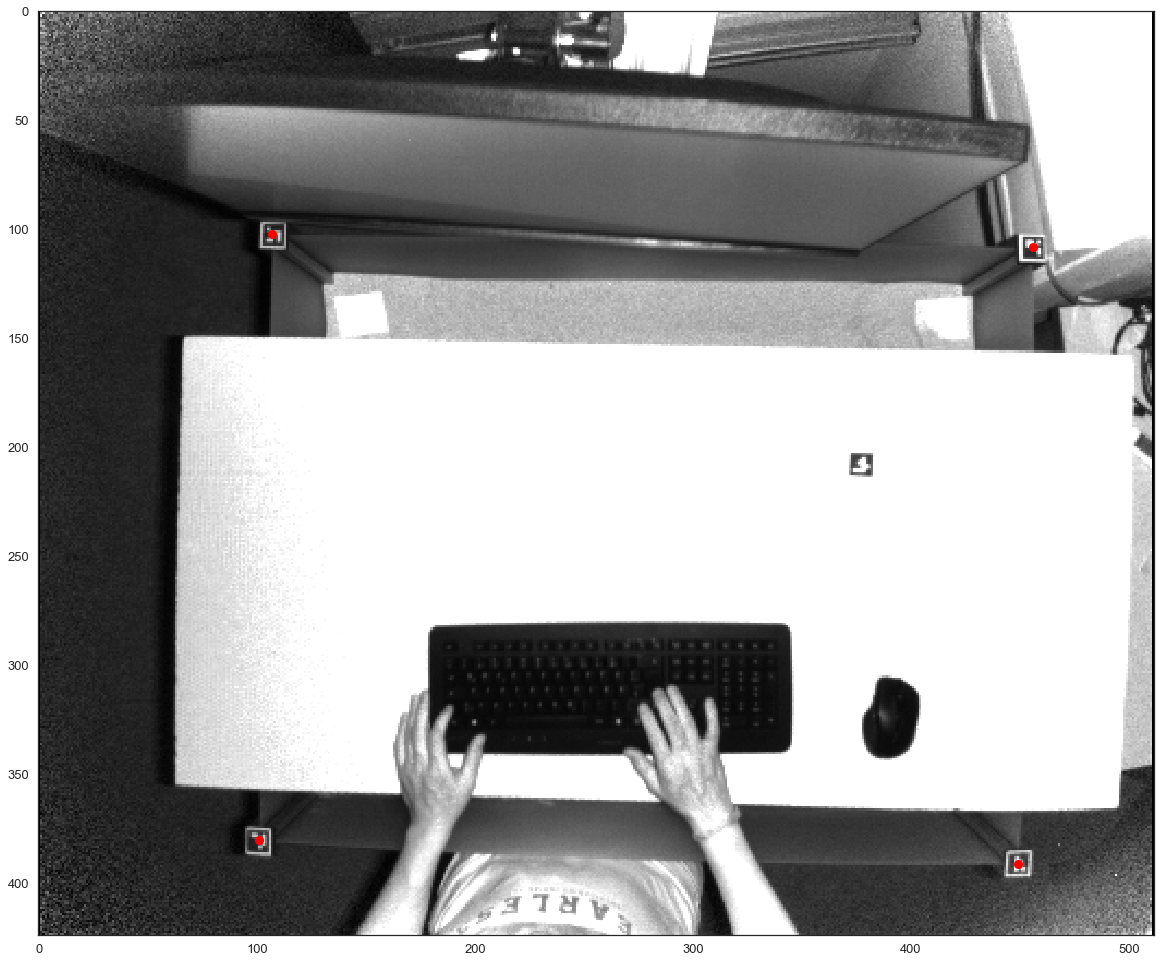

In [32]:
marker.plot_ir_aruco_location(kinect)

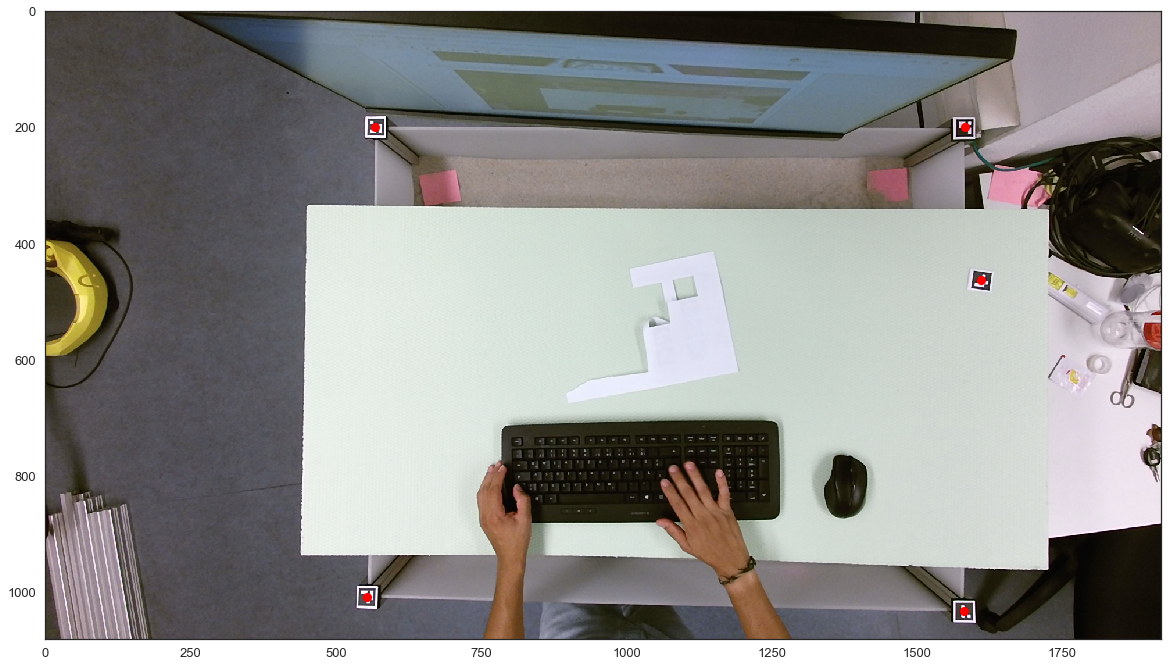

In [45]:
marker.plot_rgb_aruco_location(kinect)

In [50]:
marker.update_dict_markers_current()

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
2,108,456,200,1582
6,102,107,199,568
11,380,101,1007,553
15,NaN,NaN,462,1610
16,391,449,1032,1581


In [47]:
marker.update_dict_markers_all()

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
2,108,456,200,1582
6,102,107,199,568
11,380,101,1007,553
15,242,265,462,1610
16,391,449,1032,1581
17,395,269,NaN,NaN
37,NaN,NaN,740,811


In [59]:
drop=df[df.isna().any(1)]
drop

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
15,NaN,NaN,462,1610


In [52]:
marker.change_point_RGB_to_DepthIR()

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
2,108,456,200,1582
6,102,107,199,568
11,380,101,1007,553
15,203,475,462,1610
16,391,449,1032,1581


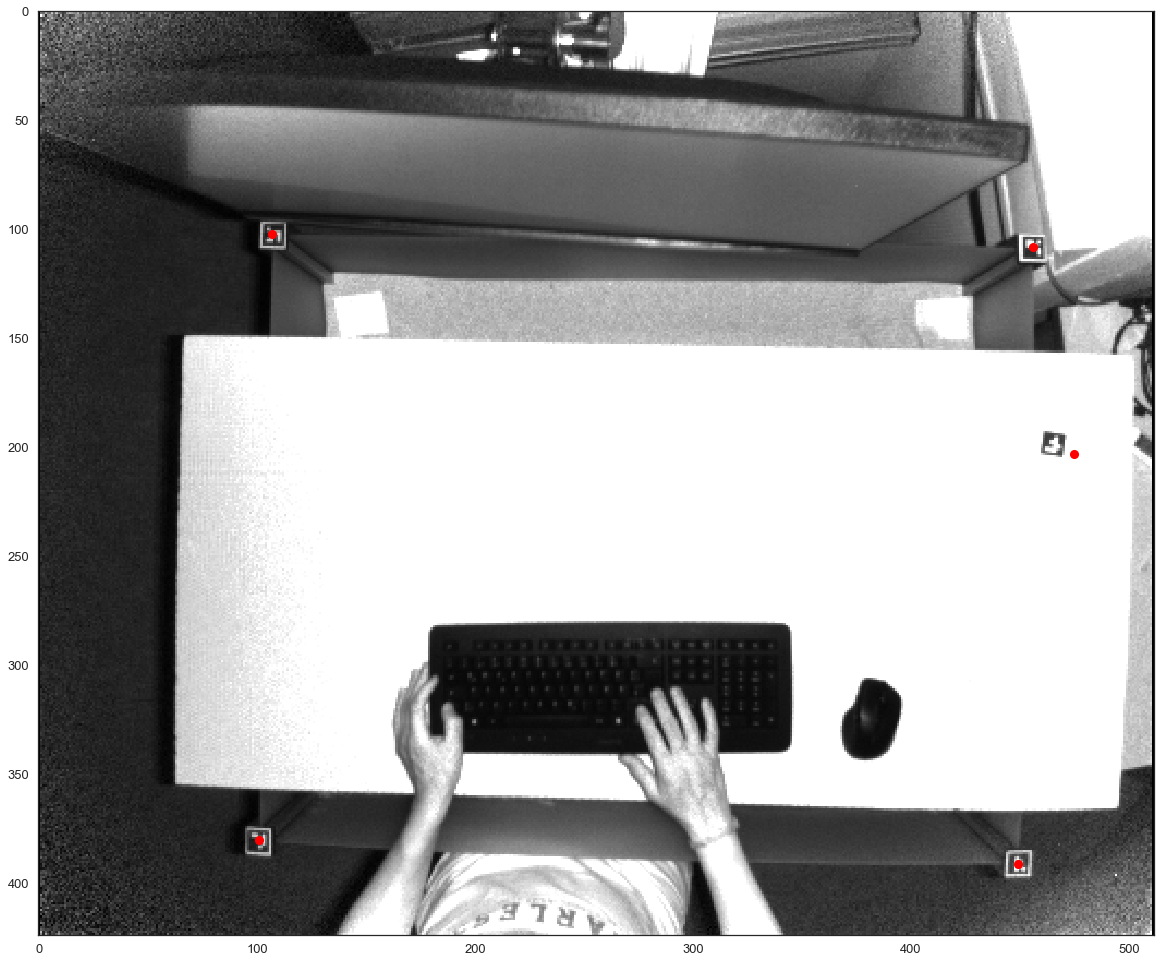

In [53]:
marker.plot_ir_aruco_location(kinect)

In [49]:
marker.erase_dict_markers_all()

""


In [51]:
marker.dict_markers_current

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
2,108,456,200,1582
6,102,107,199,568
11,380,101,1007,553
15,NaN,NaN,462,1610
16,391,449,1032,1581


In [ ]:

print(kinect.get_color().shape,kinect.get_frame().shape)
a=kinect.get_color()
b=np.flipud(kinect.get_frame())
c=(kinect.get_ir_frame())

"""plt.figure()
plt.subplot(1,3,1)
plt.imshow(a)
plt.subplot(1,3,2)
plt.imshow(b)
plt.subplot
1,3,3)"""
plt.figure(figsize=(20,20))
plt.imshow(c,cmap='gray')
plt.colorbar()


In [ ]:
np.save('color.npy',a)
np.save('depth.npy',b)
np.save('IR.npy',c)

In [ ]:
pos=c[5,10]


In [ ]:
pos.shape

In [ ]:
sb.PyKinectRuntime.PyKinectRuntime.

In [76]:
kinect.get_mapped(pos)

AttributeError: 'KinectV2' object has no attribute 'get_mapped'

In [93]:
kinect.get_color().shape

(1080, 1920, 3)

In [96]:
kinect.kinect._mapper.MapColorFrameToDepthSpace(np.array(drop[["Corners_RGB_x", "Corners_RGB_y"]]).astype(np.int16))

TypeError: required argument 'depthFrameData' missing

In [97]:
import ctypes

In [100]:
x=kinect.get_color()
kinect.kinect._mapper.MapColorFrameToDepthSpace(depthFrameData=x.ctypes.data_as(ctypes.POINTER(ctypes.c_ushort)) , depthPointCount=(1080*1920),depthDataPointCount=1,depthSpacePoints=kinect.get_frame())

ArgumentError: argument 4: <class 'TypeError'>: expected LP__DepthSpacePoint instance instead of numpy.ndarray

In [72]:
np.array(drop[["Corners_RGB_x", "Corners_RGB_y"]]).astype(np.int16)

array([[1610,  462]], dtype=int16)

In [ ]:
kinect.kinect._mapper.MapCameraPointsToDepthSpace(cameraPointCount=(0,0,0),cameraPoints=(120,120))



In [ ]:
ir=kinect.kinect.get_last_infrared_frame()
ir=ir.reshape((424, 512))
plt.pcolormesh(ir, cmap='binary_r',vmin=0,  vmax=5000)


In [ ]:

plt.rcParams['figure.figsize'] = [512/30,424/30]

In [145]:
kinect.kinect._depth_frame_data_type

c_ushort_Array_217088

In [150]:
CSP_Count=kinect.kinect._depth_frame_data_capacity 
CSP_type= kinect.kinect._depth_frame_data_type
#CSP=ctypes.cast(CSP_type(), ctypes.POINTER(_ColorSpacePoint))
CSP=kinect.kinect._depth_frame_data
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.kinect._depth_frame_data_capacity,kinect.kinect._depth_frame_data, CSP_Count, CSP)

ArgumentError: argument 4: <class 'TypeError'>: expected LP__DepthSpacePoint instance instead of LP_c_ushort

In [194]:
import pykinect2


In [205]:
a = kinect.kinect._mapper.MapCameraPointToDepthSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1))
np.asarray(a)

array((440.88184, 96.45807), dtype=[('x', '<f4'), ('y', '<f4')])

In [211]:
np.asarray(pykinect2.PyKinectV2._DepthSpacePoint(0, 0))

array((0., 0.), dtype=[('x', '<f4'), ('y', '<f4')])

In [212]:
np.asarray(DFD)

ValueError: '&<H' is not a valid PEP 3118 buffer format string

c_ushort(0)

In [218]:
DFD

In [215]:
DFD=kinect.kinect._depth_frame_data
DDPC=kinect.kinect._depth_frame_data_capacity
DDPTC=kinect.kinect._depth_frame_data_type
kinect.kinect._mapper.MapColorFrameToDepthSpace()

TypeError: required argument 'depthDataPointCount' missing

In [210]:
(depthFrameData=DFD, depthDataPointCount = DDPC,
                                                depthPointCount = DDPC, depthSpacePoints=pykinect2.PyKinectV2._DepthSpacePoint(0, 0))

COMError: (-2147024809, 'The parameter is incorrect.', (None, None, None, 0, None))

In [182]:
%debug

> <ipython-input-174-24d967b30b9d>(1)<module>()
----> 1 kinect.kinect._mapper.MapCameraPointToDepthSpace(5)

ipdb> exit


In [160]:
kinect.kinect._mapper._ICoordinateMapper__com_MapColorFrameToDepthSpace()

TypeError: this function takes 4 arguments (0 given)

In [294]:
CSP_Count=kinect.kinect._depth_frame_data_capacity 
#CSP_Count
point=pykinect2.PyKinectV2._DepthSpacePoint
#point
CSP_type= point * CSP_Count.value
#CSP_type
CSP=ctypes.cast(CSP_type(), ctypes.POINTER(point))
#kinect.kinect._mapper.MapDepthFrameToColorSpace(CSP_Count,kinect.kinect._depth_frame_data, CSP_Count, CSP)
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.kinect._depth_frame_data_capacity,kinect.kinect._depth_frame_data, CSP_Count, CSP)

COMError: (-2147024809, 'The parameter is incorrect.', (None, None, None, 0, None))

In [295]:
CSP_type

__main__._DepthSpacePoint_Array_217088

In [226]:
dsp=pykinect2.PyKinectV2._DepthSpacePoint(1920*1080)

In [233]:
a = kinect.kinect._mapper.MapCameraPointsToDepthSpace(kinect.get_frame().size,kinect.get_frame(),)

TypeError: required argument 'depthPointCount' missing

In [239]:
a = kinect.kinect._mapper.MapCameraPointToDepthSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1))
np.asarray(a)

array((440.88184, 96.45807), dtype=[('x', '<f4'), ('y', '<f4')])

In [266]:
a = kinect.kinect._mapper.MapColorFrameToDepthSpace(depthFrameData=kinect.get_frame(),depthDataPointCount=dsp,depthPointCount=kinect.get_color().size,depthSpacePoints=dsp)

ArgumentError: argument 1: <class 'TypeError'>: wrong type

In [232]:
kinect.get_frame().size

217088

In [247]:
depthSpacePoint=np.resize(np.asarray(pykinect2.PyKinectV2._DepthSpacePoint),(1920,1080))

In [248]:
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.get_frame(),depthSpacePoint)

TypeError: required argument 'depthPointCount' missing

In [264]:
god=pykinect2.PyKinectV2.ICoordinateMapper()
god.MapColorFrameToDepthSpace(kinect.get_frame().size,kinect.get_frame(),kinect.get_color().size)

TypeError: Expected a COM this pointer as first argument

In [292]:
god.MapColorFrameToDepthSpace(CSP_Count.value,np.ushort(kinect.get_frame()),CSP_Count)



TypeError: Expected a COM this pointer as first argument

In [285]:
a=kinect.get_frame()
ctypes.POINTER(ctypes.c_ushort)()

In [279]:
a.ctypes.POINTER(ctypes.c_ushort)

AttributeError: '_ctypes' object has no attribute 'POINTER'

In [282]:
ctypes.POINTER(ctypes.c_ushort)(a)

TypeError: expected c_ushort instead of numpy.ndarray

In [291]:
type(np.ushort(a))

numpy.ndarray

In [288]:
type(a)

numpy.ndarray

In [290]:
a

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 965, 958,   0],
       [  0,   0,   0, ..., 957, 955,   0],
       [  0,   0,   0, ..., 976, 932,   0]], dtype=uint16)